<a href="https://colab.research.google.com/github/charmander2810/Deep_Learning/blob/main/Kaggle_Lung_Disease_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_data="/content/drive/MyDrive/Lungs_disease/data/train"
test_data="/content/drive/MyDrive/Lungs_disease/data/test"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow. keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D , Conv2D, Flatten
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from glob import glob
import tensorflow_hub as hub

In [ ]:
import os
path_list=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Lungs_disease/data/train'):
    for filename in filenames:
      file_path=os.path.join(dirname, filename)
      print(file_path)
      path_list.append(file_path)
print("All file paths:", path_list)

/content/drive/MyDrive/Lungs_disease/data/train/Healthy/019.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/014.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/021.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/023.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/02.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/020.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/013.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/012.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/022.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/017.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/018.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/01.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/016.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/010.jpeg
/content/drive/MyDrive/Lungs_disease/data/train/Healthy/015.jpeg
/content/drive/MyDrive/Lung

In [ ]:
path_list

['/content/drive/MyDrive/Lungs_disease/data/train/Healthy/019.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/014.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/021.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/023.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/02.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/020.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/013.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/012.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/022.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/017.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/018.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/01.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/016.jpeg',
 '/content/drive/MyDrive/Lungs_disease/data/train/Healthy/010.jpeg',
 '/content/drive/MyDrive/Lungs_disea

In [ ]:
import os

label_list = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Lungs_disease/data/train'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        labels = file_path.split(os.path.sep)[-2]  # Assuming label is the second-to-last element
        print("File path:", file_path)
        print("Label:", labels)
        label_list.append(labels)

# Now label_list contains all the labels from the file paths
print("All labels:", label_list)


File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/019.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/014.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/021.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/023.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/02.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/020.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/013.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/012.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/022.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/017.jpeg
Label: Healthy
File path: /content/drive/MyDrive/Lungs_disease/data/train/Healthy/018.jpeg
Label: Healthy


In [ ]:
label_list

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1 disease',
 'Type 1

In [ ]:
# now i get my all filepaths and corresponding labels
x=path_list
y=label_list

In [ ]:
len(x),len(y)

(251, 251)

In [ ]:
data_dict = {'Path': x, 'Label': y}

# Convert the dictionary to a pandas DataFrame
data_df = pd.DataFrame(data_dict)

print(data_df)

                                                  Path           Label
0    /content/drive/MyDrive/Lungs_disease/data/trai...         Healthy
1    /content/drive/MyDrive/Lungs_disease/data/trai...         Healthy
2    /content/drive/MyDrive/Lungs_disease/data/trai...         Healthy
3    /content/drive/MyDrive/Lungs_disease/data/trai...         Healthy
4    /content/drive/MyDrive/Lungs_disease/data/trai...         Healthy
..                                                 ...             ...
246  /content/drive/MyDrive/Lungs_disease/data/trai...  Type 2 disease
247  /content/drive/MyDrive/Lungs_disease/data/trai...  Type 2 disease
248  /content/drive/MyDrive/Lungs_disease/data/trai...  Type 2 disease
249  /content/drive/MyDrive/Lungs_disease/data/trai...  Type 2 disease
250  /content/drive/MyDrive/Lungs_disease/data/trai...  Type 2 disease

[251 rows x 2 columns]


In [ ]:
data_df

,Path,Label
0,/content/drive/MyDrive/Lungs_disease/data/trai...,Healthy
1,/content/drive/MyDrive/Lungs_disease/data/trai...,Healthy
2,/content/drive/MyDrive/Lungs_disease/data/trai...,Healthy
3,/content/drive/MyDrive/Lungs_disease/data/trai...,Healthy
4,/content/drive/MyDrive/Lungs_disease/data/trai...,Healthy
...,...,...
246,/content/drive/MyDrive/Lungs_disease/data/trai...,Type 2 disease
247,/content/drive/MyDrive/Lungs_disease/data/trai...,Type 2 disease
248,/content/drive/MyDrive/Lungs_disease/data/trai...,Type 2 disease
249,/content/drive/MyDrive/Lungs_disease/data/trai...,Type 2 disease


In [ ]:
types=data_df["Label"].to_numpy()

In [ ]:
unique_types=np.unique(types)
unique_types

array(['Healthy', 'Type 1 disease', 'Type 2 disease'], dtype=object)

In [ ]:
boolean_label=[i==unique_types for i in types]
boolean_label[:5]

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False])]

In [ ]:
x=data_df["Path"]
y=boolean_label

In [ ]:
x

0      /content/drive/MyDrive/Lungs_disease/data/trai...
1      /content/drive/MyDrive/Lungs_disease/data/trai...
2      /content/drive/MyDrive/Lungs_disease/data/trai...
3      /content/drive/MyDrive/Lungs_disease/data/trai...
4      /content/drive/MyDrive/Lungs_disease/data/trai...
                             ...                        
246    /content/drive/MyDrive/Lungs_disease/data/trai...
247    /content/drive/MyDrive/Lungs_disease/data/trai...
248    /content/drive/MyDrive/Lungs_disease/data/trai...
249    /content/drive/MyDrive/Lungs_disease/data/trai...
250    /content/drive/MyDrive/Lungs_disease/data/trai...
Name: Path, Length: 251, dtype: object

In [ ]:
y[:5]

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False])]

In [ ]:
# let split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
x_train,x_val,y_train,y_val=train_test_split(x,
                                             y,
                                             test_size=0.2,
                                            random_state=42)

len(x_train),len(y_train),len(x_val),len(y_val)

(200, 200, 51, 51)

In [ ]:
# define image size

IMG_SIZE=224

#create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
  takes an image file path and turns the image into a tensor.
  """
  #read in an image file
  image=tf.io.read_file(image_path)

  #turn the ipg image into numerical tensor with 3 colour channels(red,green,blue)
  image=tf.image.decode_jpeg(image,channels=3)

  #convert the colour channels values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)

  #resize the image to our desired values(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
#create a simple function to return the tuple (image,label)
def get_image_label(image_path,label):
  """
  take an image file path name and the association label,
  processes the image and returns a tuple of(image,label).
  """
  image=process_image(image_path)
  return image,label

In [ ]:
#create a databatches
#define the batch size 32 is good start
BATCH_SIZE=32

#create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  creates batches of data out of image (x) and label (y) pairs.
  shuffles the data if its training data but doesnt shuffle if it's validation data.
  also accept test data as input(no labels).
  """
  #if the data is a test dataset we probably dont have labels
  if test_data:
    print("creating test data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))  #only filepaths (no labels)
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
    #if the data is a valid dataset,we dont need to shuffle it
  elif valid_data:
    print("creating validation data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                             tf.constant(y))) # labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batch..")
    #turn filepath and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    #shuffling pathname and labels before mapping image processor function is faster than shuffling images
    data =data.shuffle(buffer_size=len(x))


    #create (image,label) tuples(this also turns the image path into a preprocessed image
    data=data.map(get_image_label)

    # turn the training data into batches
    data_batch=data.batch(BATCH_SIZE)

  return data_batch




In [ ]:
data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

creating training data batch..
creating validation data batches..


In [ ]:
# setup input shape to the model

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]# batch,height,width,colour channels

#setup output shape of our model
OUTPUT_SHAPE=len(unique_types)

#setup model URL from tensorflow Hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

# https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [ ]:
# create a function which builds a keras model:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:",MODEL_URL)

  #setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #layer1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # layer 2 (output layer)
  ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
#callbacks
#load tensorboard notebook extension
%load_ext tensorboard

import datetime

#create a function to build a tensorboard callbacks
def create_tensorboard_callbacks():
  #create a log directory for storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog vision/logs",
                      #make it so the logs get tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
# Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                           patience=3)

In [ ]:
# training a model
NUM_EPOCHS=10

# build a function to train and return a trained model
def train_model():
  """
  trains a given model and returns the trained version.
  """
  #create a model
  model=create_model()

  # create new tensorboard session evertime we train a model
  tensorboard=create_tensorboard_callbacks()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  #return the fitted model
  return model

In [ ]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/10
7/7 [==============================] - 21s 2s/step - loss: 0.9357 - accuracy: 0.5650 - val_loss: 0.5860 - val_accuracy: 0.7255
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 0.4430 - accuracy: 0.8150 - val_loss: 0.4013 - val_accuracy: 0.8824
Epoch 3/10
7/7 [==============================] - 14s 2s/step - loss: 0.2843 - accuracy: 0.9000 - val_loss: 0.3782 - val_accuracy: 0.9020
Epoch 4/10
7/7 [==============================] - 14s 2s/step - loss: 0.1996 - accuracy: 0.9450 - val_loss: 0.3617 - val_accuracy: 0.8824
Epoch 5/10
7/7 [==============================] - 14s 2s/step - loss: 0.1625 - accuracy: 0.9450 - val_loss: 0.3586 - val_accuracy: 0.8824
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.1312 - accuracy: 0.9600 - val_loss: 0.3215 - val_accuracy: 0.8824


In [ ]:
# create a function to save a model
def save_model(model,suffix=None):
  """
  saves a given model in a models directory and appends a suffix (string).
  """
  # create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/Lungs_disease/data",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir + "-" + suffix + ".h5" # save format of model
  print(f"saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model, suffix="lung_disease_model")

saving model to:drive/MyDrive/Dog vision/models/20230822-14571692716267-lung_disease_model.h5...


'drive/MyDrive/Dog vision/models/20230822-14571692716267-lung_disease_model.h5'

In [ ]:
#create a function to load a trained model
def load_model(model_path):
  """
  load a saved model from a specified path.
  """
  print(f"loading saved model from : {model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
model =load_model('drive/MyDrive/Dog vision/models/20230822-14571692716267-lung_disease_model.h5')

loading saved model from : drive/MyDrive/Dog vision/models/20230822-14571692716267-lung_disease_model.h5


In [ ]:
# converting the test data which is suitable for the trained model
# 1)making the filepath for the images
# 2)creating function for return the image to tensors and into a batches
# 3)predict the test data for the disease_labels using the trained model

In [ ]:
path_list=[]
labels_list=[]
for dirname,_,filenames in os.walk("/content/drive/MyDrive/Lungs_disease/data/test"):
  for filename in filenames:
    file_path=os.path.join(dirname,filename)
    labels = file_path.split(os.path.sep)[-2] #getting the last 2nd name the label for cross checking in some data we need to predict the label
    path_list.append(file_path)
    labels_list.append(labels)


In [ ]:
test_dict={"path":path_list,
          "label":labels_list}
test_dict=pd.DataFrame(test_dict)
test_dict

,path,label
0,/content/drive/MyDrive/Lungs_disease/data/test...,Type 1 disease
1,/content/drive/MyDrive/Lungs_disease/data/test...,Type 1 disease
2,/content/drive/MyDrive/Lungs_disease/data/test...,Type 1 disease
3,/content/drive/MyDrive/Lungs_disease/data/test...,Type 1 disease
4,/content/drive/MyDrive/Lungs_disease/data/test...,Type 1 disease
...,...,...
61,/content/drive/MyDrive/Lungs_disease/data/test...,healthy
62,/content/drive/MyDrive/Lungs_disease/data/test...,healthy
63,/content/drive/MyDrive/Lungs_disease/data/test...,healthy
64,/content/drive/MyDrive/Lungs_disease/data/test...,healthy


In [ ]:
path_list[50]

'/content/drive/MyDrive/Lungs_disease/data/test/healthy/0106.jpeg'

In [ ]:
labels_list[50]


'healthy'

In [ ]:
test_x=path_list
test_data=create_data_batches(test_x,test_data=True)

creating test data batches..


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predict=model.predict(test_data)

3/3 [==============================] - 11s 3s/step


In [ ]:
test_predict[:10]

array([[2.84624845e-03, 9.95654941e-01, 1.49880513e-03],
       [3.29187715e-05, 9.99952137e-01, 1.49548669e-05],
       [7.56901279e-02, 9.19029236e-01, 5.28052635e-03],
       [2.19377279e-01, 6.75175428e-01, 1.05447255e-01],
       [8.84023029e-03, 9.82217491e-01, 8.94227065e-03],
       [2.72866891e-05, 9.99958813e-01, 1.38011210e-05],
       [2.74047256e-03, 8.43133807e-01, 1.54125705e-01],
       [2.19377279e-01, 6.75175428e-01, 1.05447255e-01],
       [9.41401571e-02, 2.91735381e-01, 6.14124477e-01],
       [1.56604480e-02, 9.82286036e-01, 2.05358863e-03]], dtype=float32)

In [ ]:
# turn prediction probability into their respective label(easier to understand)
names=[]
def get_pred_label(predictions_probabilities):
  """
  turns an array of predictions probabilities into a label.
  """
  return unique_types[np.argmax(predictions_probabilities)]

# get a predicted label based on an array of prediction probabilities
for i in range(len(test_predict)):
    pred_label=get_pred_label(test_predict[i])
    names.append(pred_label)

In [ ]:
len(test_predict),len(test_dict)

(66, 66)

In [ ]:
names.count("Type 1 disease"),names.count("Healthy"),names.count("Type 2 disease")

(24, 18, 24)

In [ ]:
test_dict["label"].value_counts()

Type 1 disease    26
Type 2 disease    20
healthy           20
Name: label, dtype: int64

In [ ]:
predicted_comparing_true_label={"predict":names,
                                 "true_label":test_dict["label"]}
last_comparing=pd.DataFrame(predicted_comparing_true_label)
last_comparing[:60]

,predict,true_label
0,Type 1 disease,Type 1 disease
1,Type 1 disease,Type 1 disease
2,Type 1 disease,Type 1 disease
3,Type 1 disease,Type 1 disease
4,Type 1 disease,Type 1 disease
5,Type 1 disease,Type 1 disease
6,Type 1 disease,Type 1 disease
7,Type 1 disease,Type 1 disease
8,Type 2 disease,Type 1 disease
9,Type 1 disease,Type 1 disease


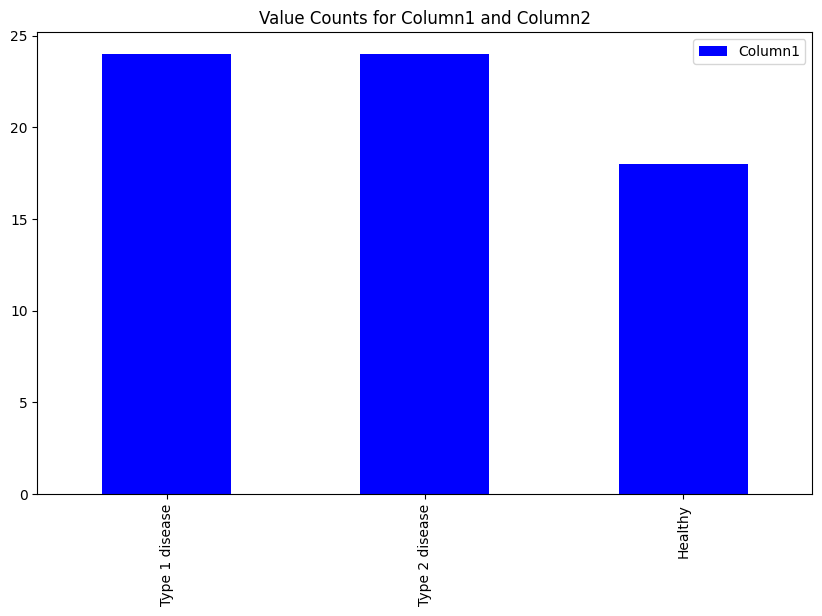

In [ ]:
value_counts_col1 = last_comparing['predict'].value_counts()
value_counts_col2 = last_comparing['true_label'].value_counts()

# Plot the value counts for each column
plt.figure(figsize=(10, 6))
value_counts_col1.plot(kind='bar', color='blue', label='Column1')
plt.title('Value Counts for Column1 and Column2')
plt.legend()
plt.show()

<Axes: >

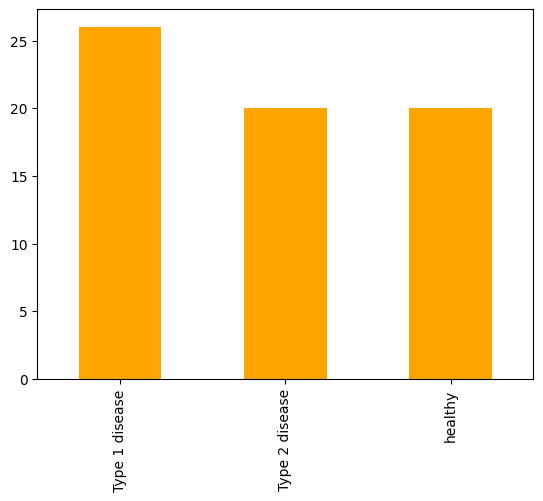

In [ ]:
value_counts_col2.plot(kind='bar', color='orange', label='Column2')